In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the uploaded CSV file to check its content
file_path = '/content/bangkok-air-quality(1).csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information about the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062 entries, 0 to 4061
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4062 non-null   object
 1    pm25   4062 non-null   object
 2    pm10   4062 non-null   object
 3    o3     4062 non-null   object
 4    no2    4062 non-null   object
 5    so2    4062 non-null   object
 6    co     4062 non-null   object
dtypes: object(7)
memory usage: 222.3+ KB


(       date  pm25  pm10   o3  no2  so2  co
 0  2025/2/1   157    59   20    1         
 1  2025/2/2   150    63   25    3         
 2  2025/2/3   139    53   18    1         
 3  2025/2/4   122    63   19    1         
 4  2025/2/5   134    56   22    2         ,
 None)

In [35]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Remove duplicate dates to count each day only once
unique_dates = data['date'].nunique()

# Print the total number of unique days
print(f"Total number of unique days: {unique_dates}")

Total number of unique days: 4062


In [36]:
# Step 1: Clean the data

# Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Convert numeric columns to proper data types
numeric_columns = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check for null values and basic statistics
cleaned_info = {
    "null_values": data.isnull().sum(),
    "basic_statistics": data.describe(),
    "cleaned_head": data.head()
}

cleaned_info

{'null_values': date       0
 pm25     945
 pm10      16
 o3        48
 no2      207
 so2     1814
 co      3099
 dtype: int64,
 'basic_statistics':                                 date         pm25         pm10           o3  \
 count                           4062  3117.000000  4046.000000  4014.000000   
 mean   2019-07-28 14:51:56.100443136    82.216554    39.620119    18.266069   
 min              2013-12-31 00:00:00    11.000000     4.000000     1.000000   
 25%              2016-10-15 06:00:00    59.000000    26.000000    10.000000   
 50%              2019-07-28 12:00:00    75.000000    35.000000    16.000000   
 75%              2022-05-10 18:00:00    99.000000    50.000000    23.000000   
 max              2025-02-20 00:00:00   187.000000   528.000000   119.000000   
 std                              NaN    31.105223    23.649329    11.631563   
 
                no2          so2          co  
 count  3855.000000  2248.000000  963.000000  
 mean     12.017639     3.551601    

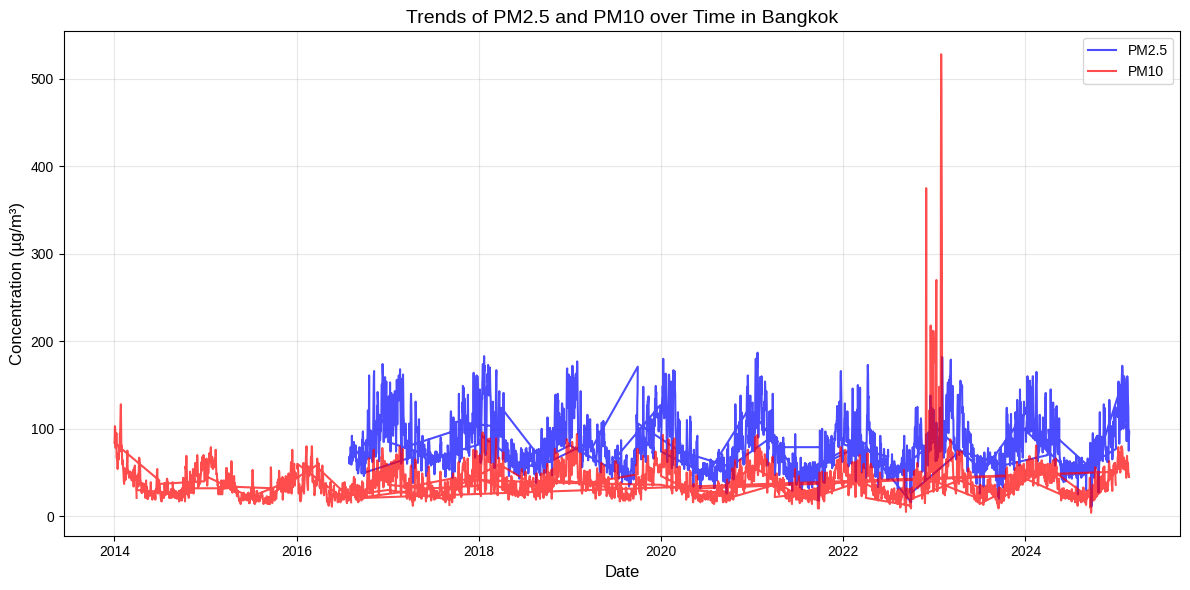

In [37]:
# Step 2: Analyze Trends (Focus on PM2.5 and PM10)
plt.figure(figsize=(12, 6))

# Plot PM2.5 trends over time
plt.plot(data['date'], data['pm25'], label="PM2.5", alpha=0.7, color='blue')
plt.plot(data['date'], data['pm10'], label="PM10", alpha=0.7, color='red')

plt.title("Trends of PM2.5 and PM10 over Time in Bangkok", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


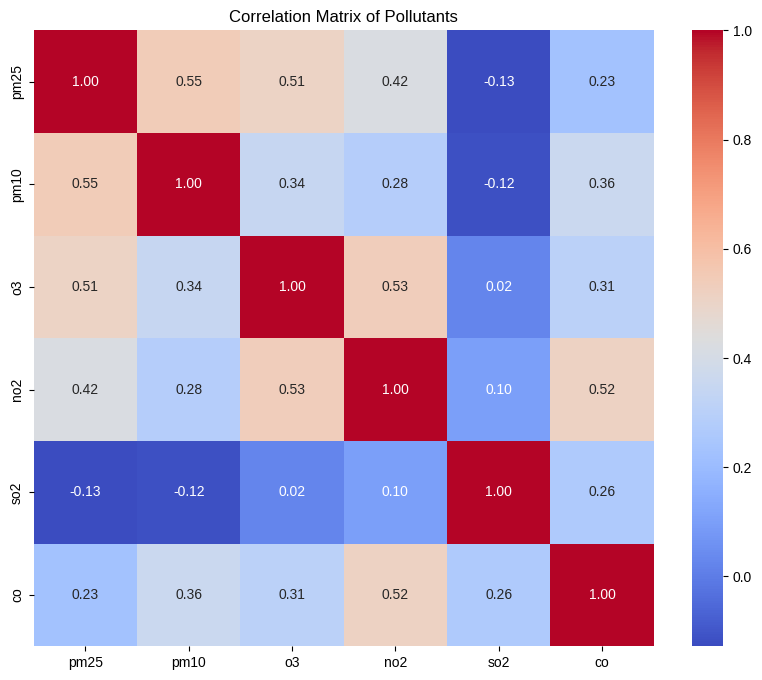

In [38]:
# Step 3: Correlation Analysis
# Compute correlations between pollutants
correlation_matrix = data[numeric_columns].corr()
# Plot Correlation Matrix (Step 3)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Pollutants")
plt.show()

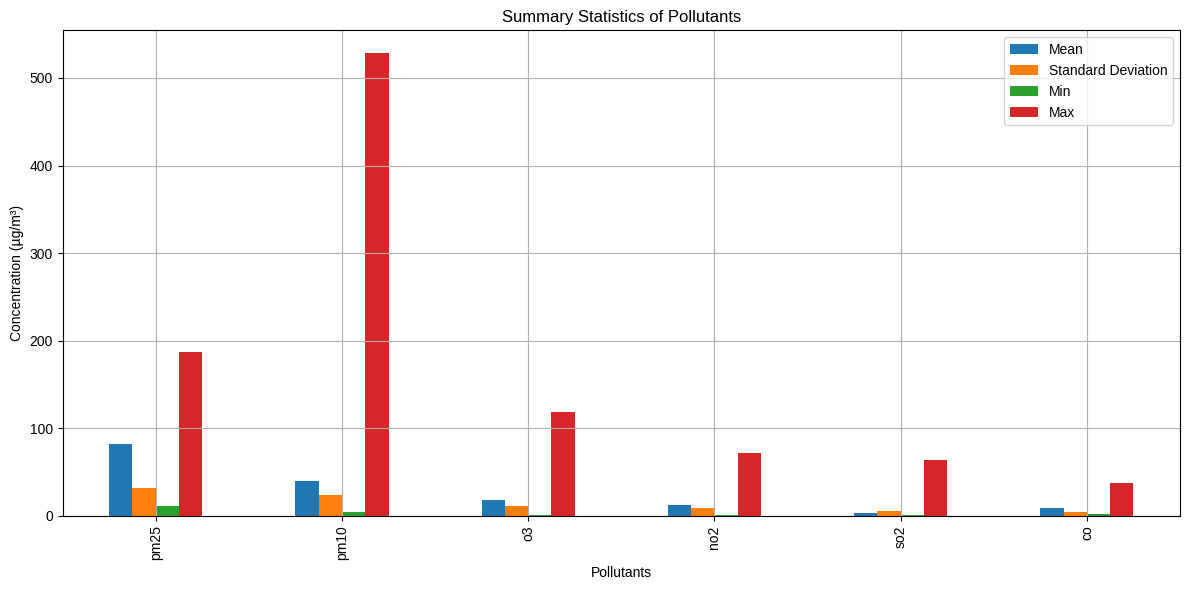

In [39]:
# Step 4: Statistical Analysis
# Summary statistics for each pollutant
statistics_summary = data[numeric_columns].describe()
# Plot Summary Statistics (Step 4)
statistics_summary.loc[['mean', 'std', 'min', 'max']].T.plot(
    kind='bar', figsize=(12, 6), grid=True)
plt.title("Summary Statistics of Pollutants")
plt.ylabel("Concentration (µg/m³)")
plt.xlabel("Pollutants")
plt.legend(["Mean", "Standard Deviation", "Min", "Max"])
plt.tight_layout()
plt.show()

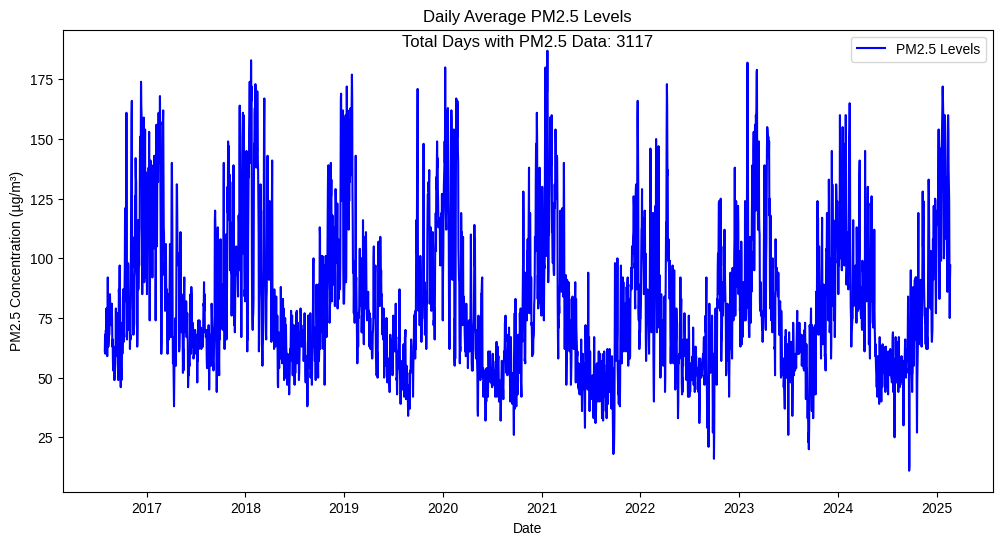

In [40]:
# Step 5: Identify High-Risk Days
# Aggregate daily average PM2.5 levels, but only for days with PM2.5 data
daily_avg_pm25 = data.groupby('date')['pm25'].mean().dropna()

# Filter the original data to include only days with PM2.5 values
filtered_data = data[data['date'].isin(daily_avg_pm25.index)]

plt.figure(figsize=(12, 6))
plt.plot(daily_avg_pm25, label='PM2.5 Levels', color='b')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('Daily Average PM2.5 Levels')

# Annotate the plot with the number of days with PM2.5 data
plt.annotate(f'Total Days with PM2.5 Data: {len(daily_avg_pm25)}',
             xy=(0.5, 0.965), xycoords='axes fraction', fontsize=12, ha='center', color='black')
plt.legend()
plt.show()

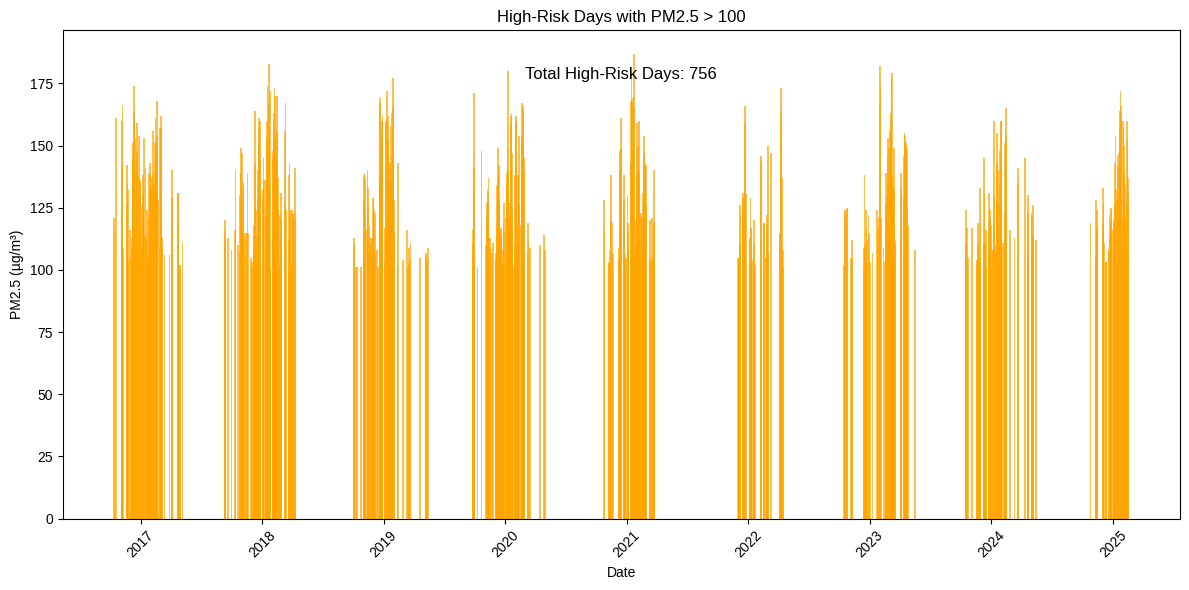

In [41]:
# Define a threshold for high PM2.5 (e.g., >100 µg/m³)
high_risk_days100 = data[data['pm25'] > 100][['date', 'pm25']]
#high_risk_days100 = daily_avg_pm25[daily_avg_pm25 > 100]

# Count the number of high-risk days
num_high_risk_days100 = high_risk_days100.shape[0]

# Plot High-Risk Days (Step 5)
plt.figure(figsize=(12, 6))
plt.bar(high_risk_days100['date'], high_risk_days100['pm25'], color='orange', alpha=0.7,width=5)
plt.title("High-Risk Days with PM2.5 > 100")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)

# Annotate the plot with the number of high-risk days
plt.annotate(f'Total High-Risk Days: {num_high_risk_days100}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='center', color='black')

plt.tight_layout()
plt.show()

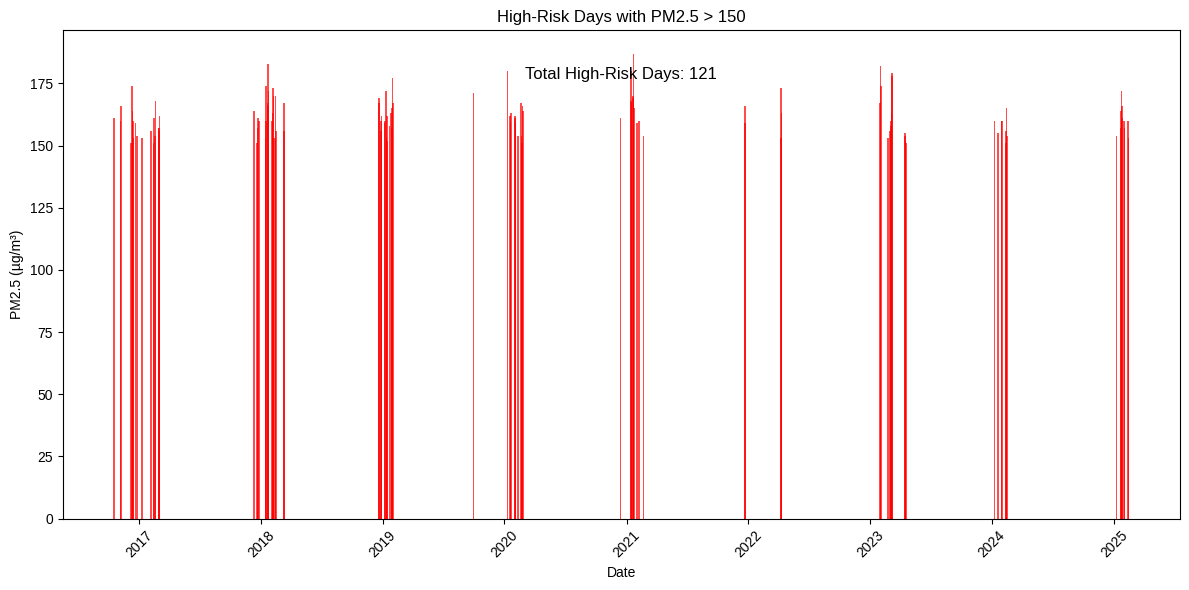

In [42]:
# Define a threshold for high PM2.5 (e.g., >100 µg/m³)
high_risk_days150= data[data['pm25'] > 150][['date', 'pm25']]
#high_risk_days150 = daily_avg_pm25[daily_avg_pm25 > 100]
# Count the number of high-risk days
num_high_risk_days150 = high_risk_days150.shape[0]

# Plot High-Risk Days (Step 5)
plt.figure(figsize=(12, 6))
plt.bar(high_risk_days150['date'], high_risk_days150['pm25'], color='red', alpha=0.7,width=5)
plt.title(f"High-Risk Days with PM2.5 > 150")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)

# Annotate the plot with the number of high-risk days
plt.annotate(f'Total High-Risk Days: {num_high_risk_days150}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='center', color='black')

plt.tight_layout()

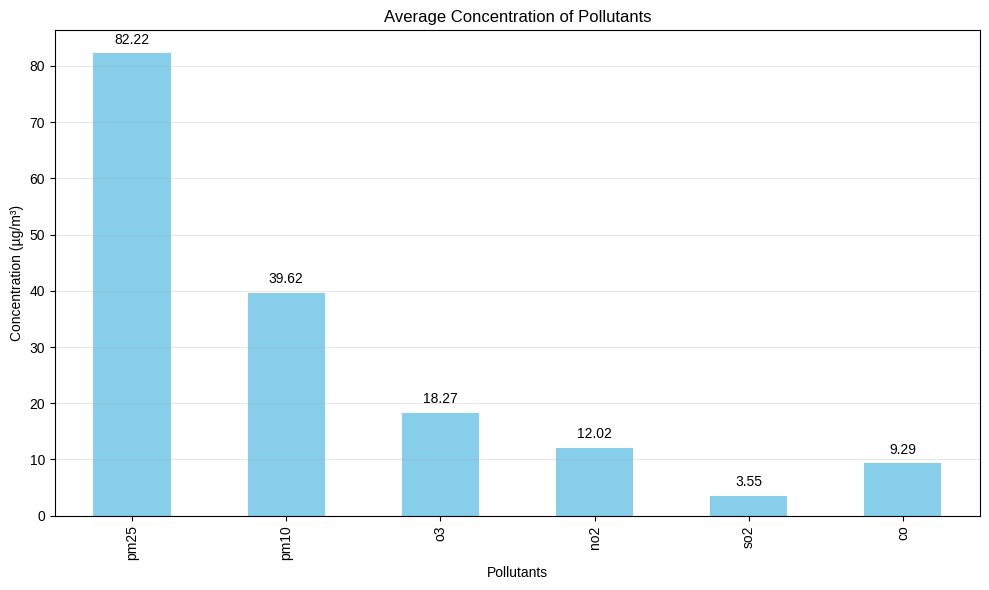

In [43]:
# Step 6: Compare Pollutants
# Compute the average concentration of each pollutant
average_pollutants = data[numeric_columns].mean()
# Compare Average Pollutants (Step 6)
ax = average_pollutants.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average Concentration of Pollutants")
plt.ylabel("Concentration (µg/m³)")
plt.xlabel("Pollutants")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Add values on top of bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [44]:
# Load the uploaded CSV file to check its content
file_path = '/content/bangkok-air-quality(1).csv'
data = pd.read_csv(file_path)

# Step 1: Import Data
data = pd.read_csv("/content/bangkok-air-quality(1).csv")

# Step 2: Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])
# Step 1: Clean the data

# Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Convert numeric columns to proper data types
numeric_columns = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

Mean Squared Error (MSE): 232.48898822735862
R-squared (R²): 0.7564223757757478


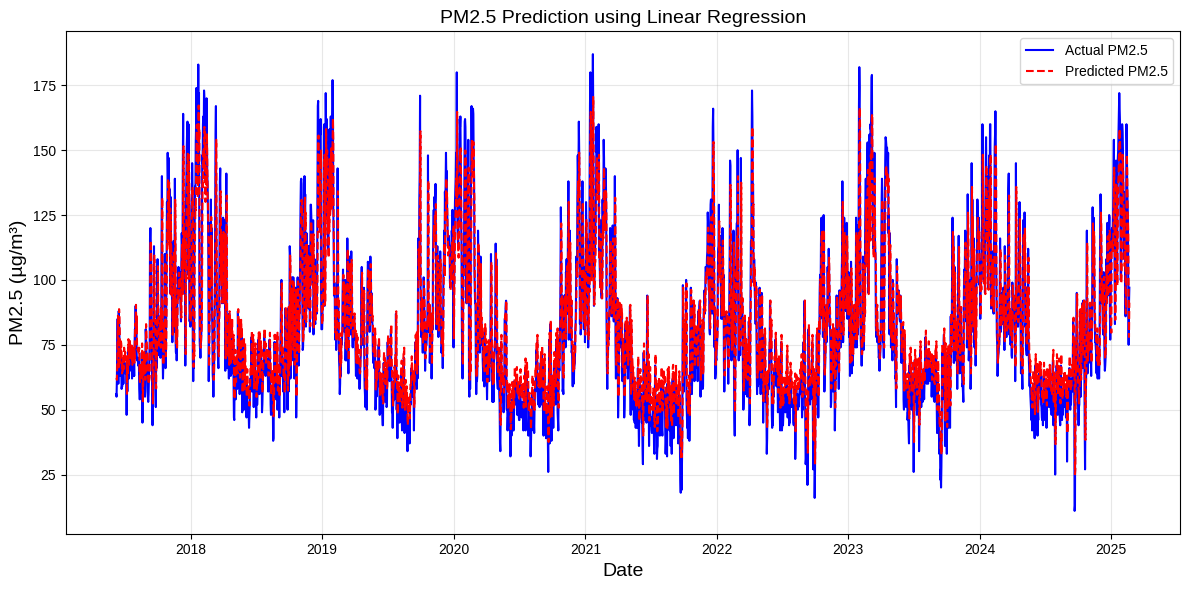

In [45]:
# สมมติว่าคอลัมน์ 'date' และ 'pm25' มีอยู่ใน data
data['date'] = pd.to_datetime(data['date'])  # แปลงคอลัมน์ date เป็น datetime
data.sort_values(by='date', inplace=True)  # เรียงลำดับข้อมูลตามวันที่
data.set_index('date', inplace=True)  # ตั้งค่า date เป็น index

# เลือกเฉพาะคอลัมน์ PM2.5
pm25_data = data['pm25'].dropna()

# สร้าง Feature และ Target (Lagged Features)
lag = 1  # ใช้ค่าของวันก่อนหน้า

df = pd.DataFrame({'PM2.5': pm25_data})
df['Lag_1'] = df['PM2.5'].shift(lag)

# ลบแถวที่มีค่า NaN (ที่เกิดจากการสร้าง Lag)
df.dropna(inplace=True)

# แบ่งข้อมูลเป็น X (Feature) และ y (Target)
X = df[['Lag_1']]
y = df['PM2.5']

# ลบแถวที่มีค่า NaN (ที่เกิดจากการสร้าง Lag)
df.dropna(inplace=True)

# แบ่งข้อมูลเป็น X (Feature) และ y (Target)
X = df[['Lag_1']]
y = df['PM2.5']

# แบ่งข้อมูลเป็นชุด Train และ Test
train_size = int(len(X) * 0.1)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 2: สร้างโมเดล Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: พยากรณ์ค่า PM2.5
y_pred = model.predict(X_test)

# คำนวณประสิทธิภาพโมเดล
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Step 4: แสดงกราฟ Actual vs Predicted
plt.figure(figsize=(12, 6))

# เปรียบเทียบค่าจริงและค่าพยากรณ์
plt.plot(y_test.index, y_test, label='Actual PM2.5', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted PM2.5', color='red', linestyle='--')

plt.title("PM2.5 Prediction using Linear Regression", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("PM2.5 (µg/m³)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


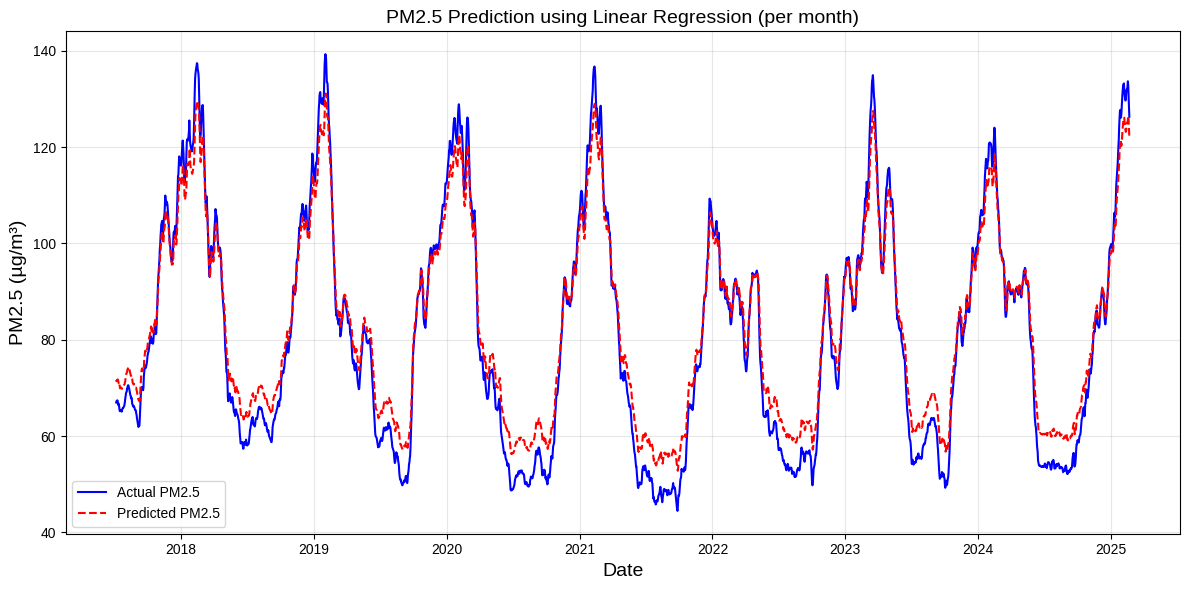

In [46]:
# คำนวณ Rolling Average (ใช้ค่าราย 30 วันเพื่อให้เส้นเรียบขึ้น)
rolling_window = 30
y_test_smooth = y_test.rolling(window=rolling_window).mean()
y_pred_smooth = pd.Series(y_pred, index=y_test.index).rolling(window=rolling_window).mean()

# แสดงกราฟที่ปรับปรุง
plt.figure(figsize=(12, 6))

plt.plot(y_test.index, y_test_smooth, label='Actual PM2.5', color='blue')
plt.plot(y_test.index, y_pred_smooth, label='Predicted PM2.5', color='red', linestyle='--')

plt.title("PM2.5 Prediction using Linear Regression (per month)", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("PM2.5 (µg/m³)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


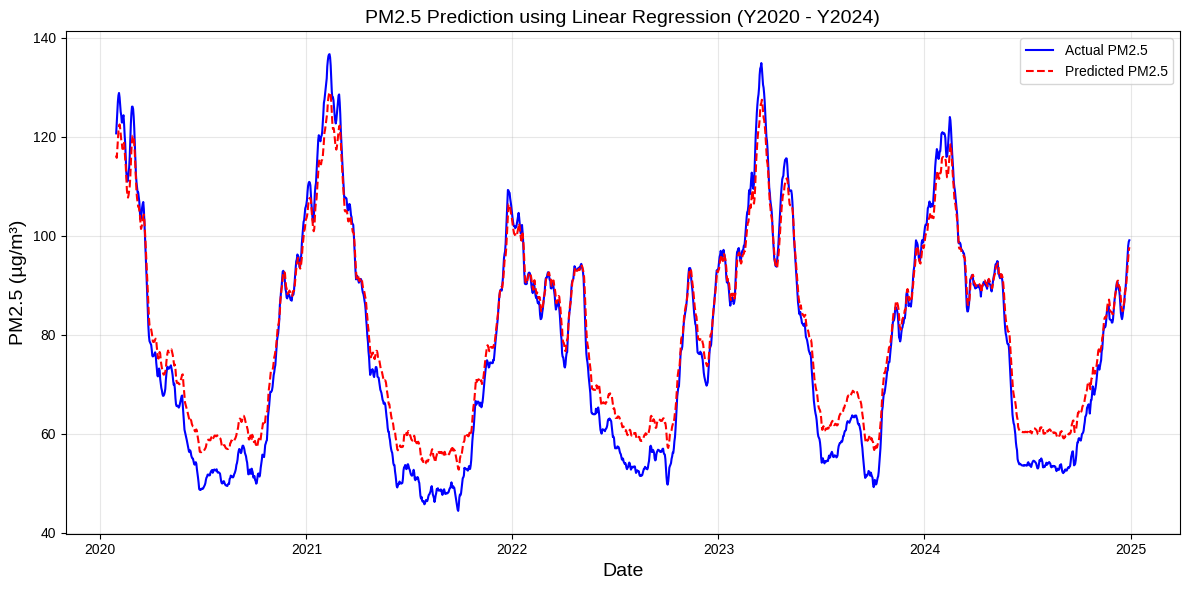

In [47]:
# เลือกช่วงวันที่ที่ต้องการ
start_date = "2020-01-01"
end_date = "2024-12-31"

y_test_filtered = y_test.loc[start_date:end_date]
y_pred_filtered = pd.Series(y_pred, index=y_test.index).loc[start_date:end_date]

# คำนวณ Rolling Average สำหรับช่วงวันที่
y_test_filtered_smooth = y_test_filtered.rolling(window=rolling_window).mean()
y_pred_filtered_smooth = y_pred_filtered.rolling(window=rolling_window).mean()

# แสดงกราฟ
plt.figure(figsize=(12, 6))

plt.plot(y_test_filtered.index, y_test_filtered_smooth, label='Actual PM2.5', color='blue')
plt.plot(y_test_filtered.index, y_pred_filtered_smooth, label='Predicted PM2.5', color='red', linestyle='--')

plt.title("PM2.5 Prediction using Linear Regression (Y2020 - Y2024)", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("PM2.5 (µg/m³)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [48]:
!pip install calplot

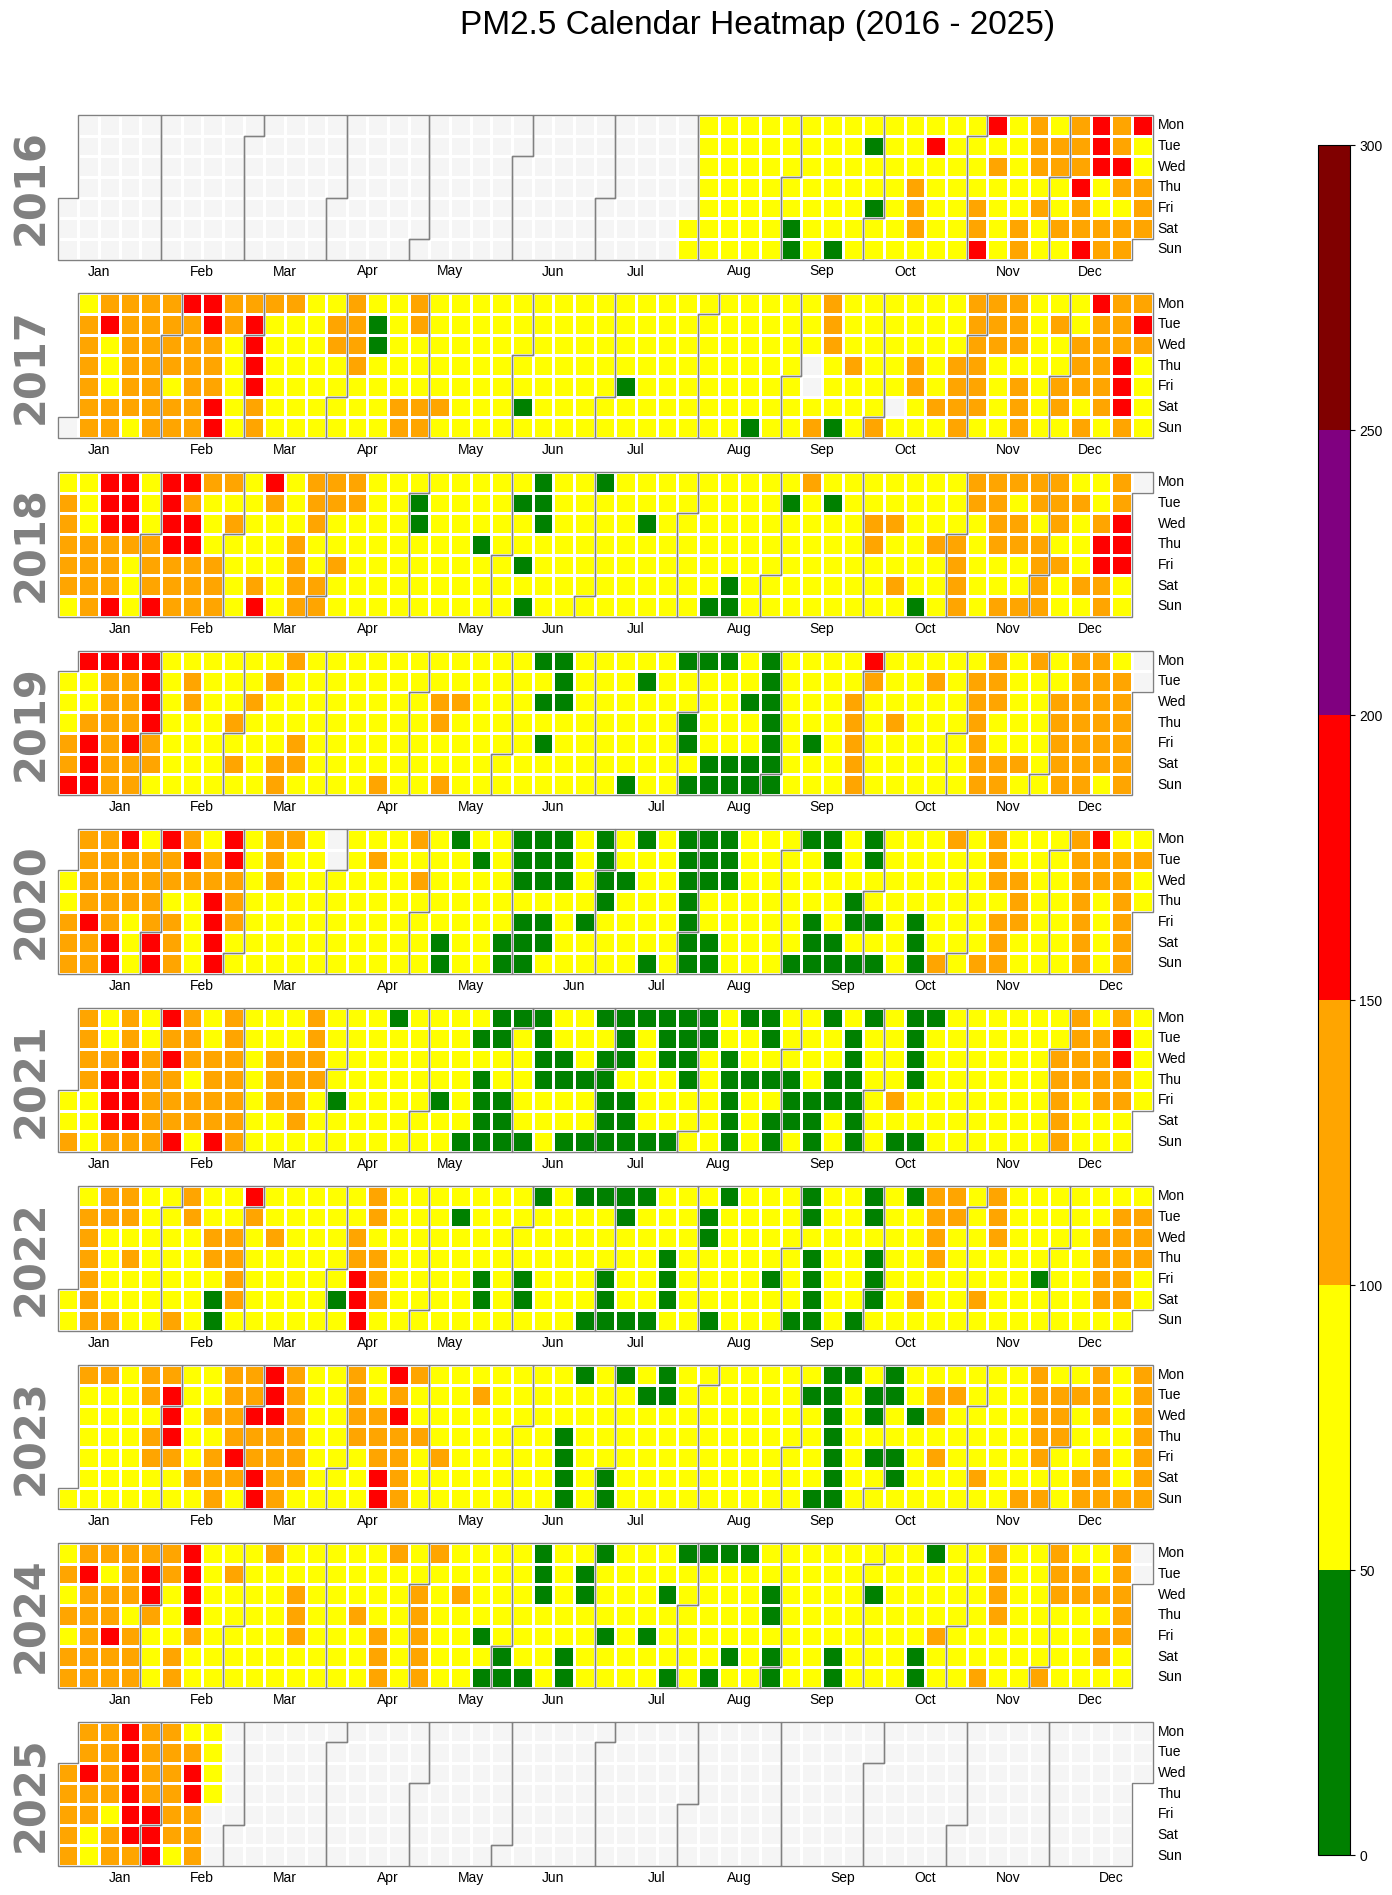

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import calplot
import warnings
import logging
import matplotlib as mpl

# Load the uploaded CSV file
file_path = '/content/bangkok-air-quality(1).csv'
data = pd.read_csv(file_path)

# Clean the data
data.columns = data.columns.str.strip()
numeric_columns = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['date'] = pd.to_datetime(data['date'], errors='coerce')

# ปิด warning ของ matplotlib.font_manager ที่เกี่ยวกับ Helvetica
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
warnings.filterwarnings("ignore", message=".*Font family 'Helvetica' not found.*")
mpl.rcParams['font.family'] = 'Liberation Sans'

# สร้างสีที่กำหนดตามระดับ PM2.5 ตาม AQI
cmap = mpl.colors.ListedColormap(['green', 'yellow', 'orange', 'red', 'purple', 'maroon'])
bounds = [0, 50, 100, 150, 200, 300]  # ปรับ bounds ให้ตรงกับ AQI

# สร้าง Calendar Heatmap
fig, ax = calplot.calplot(
    pm25_data,
    how='mean',
    cmap=cmap,
    #norm=norm, # Removed norm argument
    colorbar=True,
    figsize=(16, 18),
    vmin=bounds[0],  # Minimum value from bounds
    vmax=bounds[-1]  # Maximum value from bounds
)

plt.suptitle('PM2.5 Calendar Heatmap (2016 - 2025)', fontsize=24, y=1.05)

plt.show()